# Probabilistic classification and boosting methods

## Overview

* Probabilistic classification
* Boosting methods
* Gradient boosting


## Deterministic 0-1 classification

Until now we have considered classifiers to output a single label, i.e. 0-1 classification:

* Deterministic or 0-1 Classification:
    - $\hat{y} \in \{0,1\}$


## Probabilistic classification

In reality, many classifiers actually generate probability distributions over the classes. 

- E.g. binary probabilistic classifier $P$ maps feature vector $x_n$ of $k$ features to probability of positive class
    - $P: \mathbb{R}^k \to [0,1]$
    - $0 \leq P(x_n) \leq 1~\forall~x_n$

- These probability distributions can tell us much more information about the model than the discrete label - e.g. how *confident* the model is about each prediction

## Assessing probabilistic models

* For deterministic classification, model evaluation is straightforward
    - E.g. accuracy - how many did we get right?
    
* For probabilistic classification, no discrete labels
    - Instead, how well do predicted probabilities match data
    - E.g. cross-entropy loss

## Random forest as a probabilistic model

* 0-1 classification - take majority vote of all trees
* Probabilistic output - take *proportions* of each class in each leaf node, and average across all trees in ensemble
* Proportions are good approximations to class probabilities

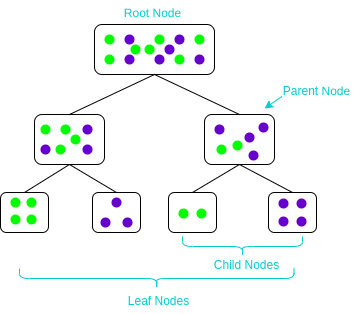

# Ensemble methods

> "The idea is to use the weak learning method several times to get a succession of hypotheses, each one refocused on the examples that the previous ones found difficult and misclassified. … Note, however, it is not obvious at all how this can be done"

\- Leslie Variant, Probably Approximately Correct

* Multiple weak learners
    * Better than at-chance performance
* Aggregate their output
    * Mode of model predictions for deterministic classification
    * Mean of predictions for regression/probabilistic classification

The question of how to use many simple models together came from the formulation of probabilistic, approximate learning (PAC learning), which formalizes machine learning algorithms in the context of computer science, with provable bounds on computation time and performance.

The general idea behind ensemble methods is that, rather than have one single model, you can take a collection of them and aggregate their output.

This results in stronger performance: "the wisdom of crowds".

Ensemble methods can be applied to both classification and regression, but here we will only consider classification.

## Ensemble methods: bagging

* Train $n$ models on subsets of the data - **b**ootstrap
    * Subsets created by sampling with replacement
* Classify any new data point based on most common prediction - **agg**regate
* Because this technique takes many uncorrelated learners to make a final model, it reduces error by reducing variance. 

The most straight-forward application of this is in bagging.

The data is split up into subsets, a model is trained on each one.

Each model is used to classify new data points. The most common output amongst all the models is the final one used.

## Ensemble methods: Boosting

* Boosting is an ensemble technique in which the predictors are not made independently, but **sequentially**.
* Main idea: Instead of using random data subsets, **focus on difficult data samples**, that previous models got wrong.
* Subsequent predictors learn from the mistakes of the previous predictors. 

Boosting ensures that observations have an unequal probability of appearing in subsequent models, and ones with the highest error appear most. In this way, the observations are not chosen based on the bootstrap process, but based on the error.

## Ensemble methods: Boosting

Start with ensemble $H$ with a single trained classifier $h_1$

1. Create new dataset with emphasis on items $H$ got wrong
2. Train a new classifier $h_2$ on this dataset, add to $H$

Repeat until $H$ contains $k$ models

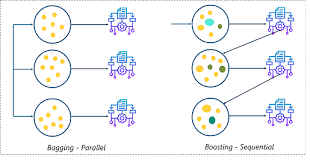

Boosting is different to bagging in that, instead of training many models at once, one is trained at a time and added to the ensemble.

Each time one is trained, the data is weighted to give more importance to the items that the previous model got wrong.

This boosts the ability of the weak learners to learn from the data.

## Ensemble methods: Boosting

For new data:

1. Each model in the ensemble makes a prediction
2. Weight predictions into final output

We weight predictions differently, so they contribute more/less to the final outcome.

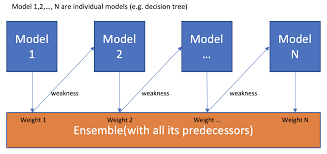

The end result is a collection of models, all trained on the same data, but with a focus on different parts of that data.

The final decision is made by taking the most common prediction overall.

A model's prediction could also be weighted.

## Boosting: implementation details

* What models to use for the ensemble?
    * In theory: any
    * In practice: decision trees

There are a few implementation details to consider for a boosting ensemble.

First is which model do you use for your ensemble?

In theory this can be any weak learner that performs better than chance on your task.

They don't even need to be the same type of model, but in practice they tend to be.

Decision trees are most commonly used and many machine learning approaches implement forms of boosting using decision trees.

Ensembles of decision trees are popular because small shallow trees are individually overfit to particular aspects of the data. If you just have one tree this is obviously not ideal, but ensembles make use of many trees.

## Gradient Boosting

* Gradient Boosting sequentially estimates base learners to minimises continuous loss function of ensemble (e.g. MSE/CEL)
* When combining the individual predictions $f(x,w_k)$, we want to minimise the ensemble prediction $F(x)$ with a weighted average:
$$min_{w,\alpha} \ L\left( y, \sum_{k=1}^N \alpha_k f(x,w_k) \right)$$
* In Gradient Boosting, at each iteration $k$, we greedily add the predictions $f(x,w_k)$ of the $k$-th individual model to the previous ensemble prediction $\hat{y}_{k-1}$, and optimize using gradient descent: 
$$min_{w_k,\alpha_k} \ L\left( y, \hat{y}_{k-1} + \alpha_k f(x,w_k) \right)$$


More generally, boosting can be viewed as an optimisation problem, where the aim is to minimise a function (in this case, the error of the ensemble), and this can be solved through gradient descent. At each iteration, we optimize the new individual decision tree so that this additive prediction is optimal.

## Boosting in practice

* Very good performance
* Directly optimises for class probabilities (akin to maximum likelihood estimation)
* Prone to overfitting
    * But regularisation can help
* Not directly interpretable
    * But can determine which features are most important to the ensemble's performance
    * See tools like SHAP (https://github.com/slundberg/shap) and LIME (https://github.com/marcotcr/lime)

Gradient Boosting approaches are popular due to their very good performance.

They are prone to overfitting - additional learners in the ensemble reduce bias, but adding too many learners to the ensemble starts to increase variance.

One issue is that they are a "black box" method, and their decisions are not directly interpretable.

There are several "interperability" packages available. A recent one is `shap`, which combines multiple approaches, from a variety of interpretability methods, to determine which features contribute most/least to the outcome of a classifier. `shap` also generates useful diagram versions of this, showing how features push/pull model output when compared to a baseline. Knowing which features contribute most to a model's success/failure can be very useful if you are responsible for gathering data - it can inform you as to where your focus should be in future, for example.

## Boosting in practice

* Performance improvement over iterations for a digits classification task:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np

data = sklearn.datasets.load_digits()

X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], random_state=0)

gbc = GradientBoostingClassifier(n_estimators=200)
gbc.fit(X_train, y_train)

plt.plot([np.mean(np.equal(preds,y_train)) for preds in gbc.staged_predict(X_train)]);
plt.plot([np.mean(np.equal(preds,y_test)) for preds in gbc.staged_predict(X_test)]);
plt.legend(["Training", "Validation"],loc="lower right")
plt.xlabel("Boosting iteration")
plt.ylabel("Accuracy");
#plt.ylim(0.8,1)
#plt.xlim(0,50);

In this simple implementation with `sklearn` we see the accuracy score from the training and validation set at each iteration of the boosting algorithm, for an image recognition task. Even though decision trees are not especially effective for image recognition, we see that with 200 trees, learned sequentially, the model achieves much higher performance than a single tree.

## Boosting in practice

* Many Python packages for different boosting algorithms
    * `sklearn.ensemble`
    * `XGBoost`
    * `LightGBM`
    * `Catboost`
* In general, boosting is hard, if not impossible, to parallelise, but libraries like `XGBoost`/`Catboost` offer GPU support, which can help with larger datasets.

There are many implementations of boosting ensembles in Python. `sklearn` has a general implementation which can use any type of model in the ensemble.

Other specific packages are available. These all use decision trees as ensemble members and are highly optimised for performance. They generally use a very similar setup to `sklearn` too and it is easy to integrate them with `sklearn` utilities like metrics, grid search, and so on.